In [1]:
import pandas as pd
import json
import regex as re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
survey_responses = pd.read_csv('Acquisition Headline Survey (RAs)_September 16, 2021_16.22.csv', header = 0).iloc[2:6]
survey_responses.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,QID1997_Last Click,QID1997_Page Submit,QID1997_Click Count,QID1999,QID2000,QID2001,QID2002_First Click,QID2002_Last Click,QID2002_Page Submit,QID2002_Click Count
2,2021-09-06 07:51:28,2021-09-06 08:37:41,IP Address,105.224.245.191,100,2772,True,2021-09-06 08:37:43,R_2rIcxXbduKRm5Pz,NaN,...,NaN,NaN,NaN,Yes,Danoo,Ideacast,4.09,12.953,15.062,5
3,2021-09-06 16:06:43,2021-09-06 16:37:51,IP Address,24.2.51.110,100,1868,True,2021-09-06 16:37:53,R_3p5aquR34erFk4X,NaN,...,2.982,5.476,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-06 17:53:24,2021-09-06 18:46:38,IP Address,17.149.237.19,100,3193,True,2021-09-06 18:46:40,R_9tcAJbXXKWkH8I1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-09-12 10:03:42,2021-09-12 10:55:28,IP Address,71.197.104.14,100,3105,True,2021-09-12 10:55:30,R_1l4ativArU3826A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_responses.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'QID1997_Last Click', 'QID1997_Page Submit', 'QID1997_Click Count',
       'QID1999', 'QID2000', 'QID2001', 'QID2002_First Click',
       'QID2002_Last Click', 'QID2002_Page Submit', 'QID2002_Click Count'],
      dtype='object', length=2818)

In [19]:
start = 4
end = 2003
subparts = 4
acq_status = []
acquirers = []
acquireds = []
completion_time = []
student_val = []

for student in range(0, 4):
    row = survey_responses.iloc[student]
    for i in range(start, end, subparts + 1):
        student_val.append(student)
        for q in range(subparts):
            curr = i + q
            q_name = 'QID{}'.format(curr)

            if q == 0:
                acq_status.append(row[q_name])
            elif q == 1:
                acquirers.append(row[q_name])
            elif q == 2:
                acquireds.append(row[q_name])
            else:
                completion_time.append(float(row[q_name + '_Page Submit']) - float(row[q_name + '_First Click']))
    print('Student', student, 'done')

Student 0 done
Student 1 done
Student 2 done
Student 3 done


In [20]:
len(acquireds)

1600

In [21]:
survey_responses_clean = pd.DataFrame({
    'Acq Status': acq_status,
    'Acquirer': acquirers,
    'Acquired': acquireds,
    'Completion Time': completion_time,
    'Student': student_val
})

survey_responses_clean

,Acq Status,Acquirer,Acquired,Completion Time,Student
0,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
1595,NaN,NaN,NaN,NaN,3
1596,Yes,Investcorp,30% stake in leading Turkish menswear retailer...,18.230,3
1597,Yes,PSS,INSI,4.057,3
1598,NaN,NaN,NaN,NaN,3


In [22]:
# add column for question headline
questions = []
with open('qualtrics_survey.qsf') as f:
    survey = json.load(f)
    for i in range(start + 1, end, subparts + 1):
        curr = re.search('[0-9]*. Headline:(.*)', survey['SurveyElements'][i]['SecondaryAttribute']).group(1).strip()
        questions.append(curr)

In [23]:
# rows that have only na
null_data = survey_responses_clean[survey_responses_clean.isnull().all(axis = 1)]
null_data.shape

(0, 5)

In [24]:
survey_responses_clean['Headline'] = questions + questions + questions + questions
survey_responses_clean

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
0,NaN,NaN,NaN,NaN,0,Better Place Sold To Sunrise Group For $12 Mil...
1,NaN,NaN,NaN,NaN,0,Action App Corporation (OTC: ANDI) Buys Anothe...
2,NaN,NaN,NaN,NaN,0,Docmail Connect for Google Apps launched!
3,NaN,NaN,NaN,NaN,0,Rent My Vacation Home ( RMVH network)Opens Ren...
4,NaN,NaN,NaN,NaN,0,Entech Solar Enters Into Preferred Stock Agree...
...,...,...,...,...,...,...
1595,NaN,NaN,NaN,NaN,3,Spanish buyer set to take over Talecris
1596,Yes,Investcorp,30% stake in leading Turkish menswear retailer...,18.230,3,Investcorp Buys 30% Stake In Leading Turkish M...
1597,Yes,PSS,INSI,4.057,3,"Preferred Systems Solutions, Inc. (PSS), annou..."
1598,NaN,NaN,NaN,NaN,3,Yellow Media Sells Vertical Media Publishing S...


In [25]:
survey_responses_clean = survey_responses_clean[survey_responses_clean['Acq Status'].notna()]
survey_responses_clean

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
6,Not sure,Entuboca.com,Nevera Roja,29.711,0,La Nevera Roja compra Entuboca.com
8,Yes,Level 3,Global Crossing,22.740,0,Level 3 To Acquire Global Crossing For $3 Bill...
12,Yes,Sugar Publishing,ShopStyle,11.800,0,Sugar Publishing Acquires ShopStyle
14,Not sure,Invitel,Fibernet,19.767,0,Invitel Reaches Sale and purchase Agreement fo...
15,Yes,Kratos Defense & Security Solution,"Digital Fusion, Inc.",14.470,0,Kratos Defense & Security Solutions Completes ...
...,...,...,...,...,...,...
1584,Yes,ABB,Mincom,4.691,3,"ABB Buys Another One: MIncom, for Managing Mines"
1586,Yes,Filogix,Cyence International Inc,7.786,3,Filogix To Acquire Cyence International Inc.
1589,Yes,Praxair,Dominion Gas,14.198,3,Praxair Acquires Dominion Gas
1596,Yes,Investcorp,30% stake in leading Turkish menswear retailer...,18.230,3,Investcorp Buys 30% Stake In Leading Turkish M...


In [26]:
# avg completion time
clean_times = survey_responses_clean.loc[survey_responses_clean['Completion Time'].notna()]['Completion Time']
print('Avg time / question', sum(clean_times) / len(clean_times))

Avg time / question 11.600358


In [27]:
print(np.median(np.extract(clean_times < 50, clean_times)))

9.276500000000002


In [32]:
for curr_student in range(4):
    clean_times_curr = survey_responses_clean.loc[survey_responses_clean['Student'] == curr_student].loc[survey_responses_clean['Completion Time'].notna()]['Completion Time']
    print('Student {}'.format(curr_student))
    print(np.median(clean_times_curr))
    print(np.mean(clean_times_curr))
    print()


Student 0
10.76
12.051688

Student 1
9.93
10.596184

Student 2
9.068999999999999
12.37284

Student 3
7.313
11.380720000000002



In [33]:
print(np.var(np.extract(clean_times < 50, clean_times)))

45.739530042977265


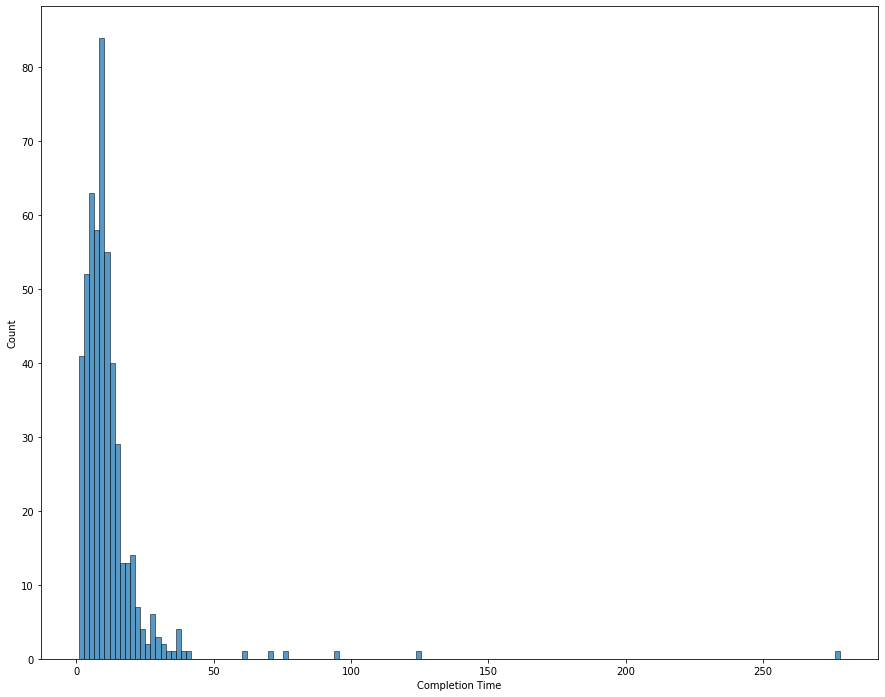

In [34]:
plt.figure(figsize = (15, 12))
sns.histplot(survey_responses_clean['Completion Time'])

In [35]:
survey_responses_clean.to_csv('survey_responses_clean.csv')

In [36]:
# number of unique headlines classified
print('Unique headlines classified', len(np.unique(survey_responses_clean['Headline'])))

Unique headlines classified 373


In [44]:
list(survey_responses_clean.loc[survey_responses_clean['Acq Status'] == 'Not sure']['Headline'])

['La Nevera Roja compra Entuboca.com',
 'Invitel Reaches Sale and purchase Agreement for Fibernet',
 'Allscripts HIMSS Press Release',
 'Oomba Inc. Engages MZ Group for Investor Relations',
 'Trendrr Appoints Alex Mann, Founder of AM Analytics, its Director',
 'Syncables to Demonstrate Wireless Syncing of Computers and Phones with Syncables® 360 and Intel® My WiFi Technology at Computex',
 'Internet Brands Buys Two Web Sites, Looks To Future Acquisitions',
 'Visumotion Changes Name to 3D International Group',
 'RedAlumnos supera los 50.000 usuarios',
 'InQvent-backed healthcare services firm Alacurity eyes up to $5M in Series A funding',
 'Stemgent to buy Asterand�s human tissue biz for $9M',
 "TCA's Ralph Mayer Joins Angel Capital Association Board",
 'Clavis Secures Funding from Enterprise Ireland',
 'SYNETY eyes global expansion with proposed reverse AIM listing',
 'One Two Trade Forex',
 "'Telefonica confirms Tuenti stake acquisition'",
 'CodeTwo Attains Microsoft Certified Partner

In [37]:
# how many rows are unsure?
survey_responses_clean['Acq Status'].value_counts()

Yes               248
No                152
Not sure           61
Not a headline     39
Name: Acq Status, dtype: int64

In [39]:
# consensus vote on acq status / acquirer / acquired
def most_common(lst):
    return max(set(lst), key = lst.count)

def func(x):
    acq_status = most_common(list(x['Acq Status']))
    acquirer = most_common(list(x['Acquirer']))
    acquired = most_common(list(x['Acquired']))
    y = pd.DataFrame({'Acq Status': [acq_status], 'Acquirer': [acquirer], 'Acquired': [acquired]})
    return y
    
consensus = survey_responses_clean.groupby('Headline').apply(func).reset_index().drop(columns = ['level_1'])
consensus = consensus.loc[:,~consensus.columns.duplicated()]
consensus

,Headline,Acq Status,Acquirer,Acquired
0,'Telefonica confirms Tuenti stake acquisition',Not sure,Telefonica,Tuenti
1,11 Billion Videos Viewed Online in the U.S. in...,Not a headline,NaN,NaN
2,140 Proof Social Advertising Product Launch,No,NaN,NaN
3,3 Key Reasons Facebook Bought FriendFeed,Yes,Facebook,FriendFeed
4,3 Rules You Must Follow If You Want Your Compa...,No,NaN,NaN
...,...,...,...,...
368,myOpenID Affiliate Blog Post,Not a headline,NaN,NaN
369,product inconsistency (it's a good thing),Not a headline,NaN,NaN
370,stack.horizobu.com - an exploration engine,Not a headline,NaN,NaN
371,"urlShort breaks 1,000 shortened URLs",No,NaN,NaN


In [40]:
consensus['Acq Status'].value_counts()

Yes               182
No                108
Not sure           56
Not a headline     27
Name: Acq Status, dtype: int64

In [41]:
consensus.to_csv('consensus.csv')

In [42]:
# what are the remaining not sure headlines?
list(consensus.loc[consensus['Acq Status'] == 'Not sure']['Headline'])

["'Telefonica confirms Tuenti stake acquisition'",
 'AeroMechanical Services Ltd. Acquires Assets of Wingspeed Corporation',
 'Allscripts HIMSS Press Release',
 'Athenahealth to pay up to $30M for Georgia firm',
 'BETACOM SA CONNECTS TO THE EO NETWORKS SA',
 'Baidu to Buy 59% of Renren�s Group-buying Service Nuomi for $160 million',
 'Big news - Rackspace and Slicehost',
 "Boston's Rue La La gets shuffled in eBay-GSI merger",
 'CallSource Appoints Brad Barnett as President',
 'Carbox boucle une 3�me lev�e aupr�s de Mobivia Groupe',
 'Carpathia Hosting Names Michael Fox Director of Sales, Public Sector',
 'Clavis Secures Funding from Enterprise Ireland',
 'CodeTwo Attains Microsoft Certified Partner Status',
 'Construction sector organizations in 100 percent ownership Tilaajavastuu Finland O',
 'Dell Shops Direct For Zing',
 'DiACardio LTD, & UltraLinq Healthcare Solutions Announce Partnership',
 'EMC to complete Isilon buyout Tuesday',
 'Entelos pays up to $39M for Iconix Biosciences',

In [80]:
# what are the remaining not a headlines?
list(consensus.loc[consensus['Acq Status'] == 'Not a headline']['Headline'])

['11 Billion Videos Viewed Online in the U.S. in April 2008',
 'Android mobile platform, �up to� $US50 million (estimated)',
 'Conker enter Wayra accelerator',
 'Current’s Claims of ‘Profitability’ Ring False',
 'EditMe - Reviews by PC Magazine',
 'EnerNOC Q3 revenue jumps on customer growth',
 'Follow Reuters      Facebook     Twitter     RSS     YouTube    Pictures Visitors run away from waves from a tidal bore as it surges past a barrier on the banks of Qiantang River, in Hangzhou Zhejiang province, August 25, 2013. REUTERS/Stringer Reuters P',
 'Glu Mobile Expands Real-Money Gambling Portfolio with Probability',
 'Joobili almost back from the deadpool, finds buyer for assets with sale to TravelShark',
 'Keep Your Little Ghosts & Goblins Safe From Ghouls This Halloween',
 'Learn Arabic on busuu.com',
 'MassHighTech: The Journal of New England Technology',
 'Meredith 10-q for Dec 2010',
 'Pitchengine Social Media Release',
 'The View Hot Topics - Ashley Madison, Cheating and Infideli

## Generate Training, Attention Check Headline Lists

In [7]:
survey_responses_clean = pd.read_csv('survey_responses_clean.csv').drop(columns = ['Unnamed: 0'])
survey_responses_clean.head()

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
0,Not sure,Entuboca.com,Nevera Roja,29.711,0,La Nevera Roja compra Entuboca.com
1,Yes,Level 3,Global Crossing,22.740,0,Level 3 To Acquire Global Crossing For $3 Bill...
2,Yes,Sugar Publishing,ShopStyle,11.800,0,Sugar Publishing Acquires ShopStyle
3,Not sure,Invitel,Fibernet,19.767,0,Invitel Reaches Sale and purchase Agreement fo...
4,Yes,Kratos Defense & Security Solution,"Digital Fusion, Inc.",14.470,0,Kratos Defense & Security Solutions Completes ...


In [8]:
# 10 training headlines -- 6 acquisition, 2 non-acquisition, 2 not a headline
# 40 acquisition headlines -- 20 acquisition, 15 non-acquisition, 5 not a headline

acq = survey_responses_clean.loc[survey_responses_clean['Acq Status'] == 'Yes']
non_acq = survey_responses_clean.loc[survey_responses_clean['Acq Status'] == 'No']
not_a_headline = survey_responses_clean.loc[survey_responses_clean['Acq Status'] == 'Not a headline']

### Select Training Headlines

In [10]:
acq.iloc[np.random.choice(np.arange(0, len(acq)), 12)]

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
282,Yes,Nokia,OZ Communications,14.711,2,Nokia to acquire leading consumer email and in...
461,Yes,Sciele Pharma,"Addrenex Pharmaceuticals, Inc",14.163,3,"Sciele Pharma, A Shionogi Company, To Acquire ..."
367,Yes,Haemonetics,"Global Med Technologies, Inc.",9.553,2,Haemonetics concludes successful tender for Gl...
296,Yes,"Filmakers Library, Inc.","Alexander Street Press, LLC",7.588,2,"Filmakers Library, Inc. Joins Forces with Alex..."
134,Yes,Synnex,BPO services,14.990,1,Synnex buys IBM's customer care BPO services b...
325,Yes,GREE,App Ant,9.968,2,"Japan�s GREE Acquires Another U.S. Studio, App..."
476,Yes,NaN,NaN,12.029,3,Gorkana joins Durrants and Metrica to deliver ...
438,Yes,NaN,NaN,5.002,3,Nuance Closes Acquisition of BeVocal
75,Yes,8x8,"Central Host, Inc.",8.495,0,"8x8 Announces Acquisition of Central Host, Inc."
297,Yes,Cisco,NDS,8.839,2,Updated: Cisco To Buy Interactive TV And Secur...


In [14]:
# select 6 acq

training_acq_ilocs = [282, 461, 367, 296, 438, 415]
training_acq = survey_responses_clean.iloc[training_acq_ilocs]
training_acq

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
282,Yes,Nokia,OZ Communications,14.711,2,Nokia to acquire leading consumer email and in...
461,Yes,Sciele Pharma,"Addrenex Pharmaceuticals, Inc",14.163,3,"Sciele Pharma, A Shionogi Company, To Acquire ..."
367,Yes,Haemonetics,"Global Med Technologies, Inc.",9.553,2,Haemonetics concludes successful tender for Gl...
296,Yes,"Filmakers Library, Inc.","Alexander Street Press, LLC",7.588,2,"Filmakers Library, Inc. Joins Forces with Alex..."
438,Yes,NaN,NaN,5.002,3,Nuance Closes Acquisition of BeVocal
415,Yes,Kensey Nash,Nerites,9.735,3,Kensey Nash buys Nerites for $20M


In [15]:
non_acq.iloc[np.random.choice(np.arange(0, len(non_acq)), 5)]

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
169,No,NaN,NaN,1.856,1,"LiveIntent Adds Jason Pressman to Board, Raise..."
478,No,NaN,NaN,4.183,3,"urlShort breaks 1,000 shortened URLs"
379,No,NaN,NaN,8.965,3,One year after the acquisition: was it all wor...
224,No,NaN,NaN,4.829,1,"Web 2.0 Finance Startup, Stockopedia raises ov..."
315,No,NaN,NaN,14.468,2,"In The Shadow Of YouTube, Vuclip Grows Its Mob..."


In [16]:
# select 2 non acq

training_non_acq_ilocs = [169, 379]
training_non_acq = survey_responses_clean.iloc[training_non_acq_ilocs]
training_non_acq

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
169,No,NaN,NaN,1.856,1,"LiveIntent Adds Jason Pressman to Board, Raise..."
379,No,NaN,NaN,8.965,3,One year after the acquisition: was it all wor...


In [17]:
not_a_headline.iloc[np.random.choice(np.arange(0, len(not_a_headline)), 5)]

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
310,Not a headline,NaN,NaN,11.562,2,Follow Reuters Facebook Twitter R...
401,Not a headline,NaN,NaN,5.684,3,Verisign Sells mQube to Mobile Messenger for
33,Not a headline,NaN,NaN,4.841,0,myOpenID Affiliate Blog Post
357,Not a headline,NaN,NaN,8.297,2,EnerNOC Q3 revenue jumps on customer growth
398,Not a headline,NaN,NaN,4.966,3,Vacation Home Spring of 2013


In [18]:
# select 2 not a headline

training_nah_ilocs = [310, 33]
training_nah = survey_responses_clean.iloc[training_nah_ilocs]
training_nah

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
310,Not a headline,NaN,NaN,11.562,2,Follow Reuters Facebook Twitter R...
33,Not a headline,NaN,NaN,4.841,0,myOpenID Affiliate Blog Post


### Select Attention Check Headlines

In [19]:
# select 20 acq

acq.iloc[np.random.choice(np.arange(0, len(acq)), 30)]

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
12,Yes,Patrick Ip,Post + Beam,9.550,0,"Patrick Ip, 22 Year Old CEO, Merges with NYC's..."
406,Yes,Scientific Conservation,Public Company,10.021,3,Scientific Conservation Buys Public Company Fo...
470,Yes,Vitalitec,Surgical Device from Novare,12.158,3,Vitalitec buys surgical device from Novare
494,Yes,Google,Sketch Up,4.151,3,Google Buys Sketch Up
49,Yes,Rentrak,Nielsen EDI,12.850,0,"Rentrak buys Nielsen EDI, consolidating box of..."
89,Yes,RBC,BlueBay,10.226,0,RBC To Buy BlueBay For US$1.5B
176,Yes,Startup,eNom,12.966,1,Startup Acquires Web Host eNom
107,Yes,Facebook,Chai Labs,12.251,0,"Facebook Makes Another ""Acq-Hire"" Chai Labs; D..."
76,Yes,HealthCentral Network,TheBody.com,9.791,0,HealthCentral Network Acquires HIV Resources S...
151,Yes,Imeem,Anywhere.FM,9.930,1,"Imeem Gobbles Up A Young Startup, Anywhere.FM"


In [20]:
# select 20 acq

att_acq_ilocs = [
    406, 494, 49, 89, 176,
    76, 151, 305, 483, 380,
    75, 420, 40, 304, 109,
    84, 87, 366, 45, 305
                ]
att_acq = survey_responses_clean.iloc[att_acq_ilocs]
att_acq

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
406,Yes,Scientific Conservation,Public Company,10.021,3,Scientific Conservation Buys Public Company Fo...
494,Yes,Google,Sketch Up,4.151,3,Google Buys Sketch Up
49,Yes,Rentrak,Nielsen EDI,12.850,0,"Rentrak buys Nielsen EDI, consolidating box of..."
89,Yes,RBC,BlueBay,10.226,0,RBC To Buy BlueBay For US$1.5B
176,Yes,Startup,eNom,12.966,1,Startup Acquires Web Host eNom
76,Yes,HealthCentral Network,TheBody.com,9.791,0,HealthCentral Network Acquires HIV Resources S...
151,Yes,Imeem,Anywhere.FM,9.930,1,"Imeem Gobbles Up A Young Startup, Anywhere.FM"
305,Yes,Havok,Trinigy,10.456,2,Intel’s Havok Acquires 3D Game Engine Provider...
483,Yes,Freeman,Encore Productions,5.198,3,Freeman Acquires Encore Productions
380,Yes,Bentley,Microprotol,6.511,3,Bentley Acquires Microprotol to Extend AutoPIP...


In [21]:
# select 15 non-acq

non_acq.iloc[np.random.choice(np.arange(0, len(non_acq)), 30)]

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
178,No,NaN,NaN,9.592,1,One year after the acquisition: was it all wor...
48,No,NaN,NaN,6.694,0,KeyToSound website front page news
83,No,NaN,NaN,2.799,0,Petsky Prunier Advises SQAD on its Sale to Cla...
15,No,Pipeline,NaN,21.576,0,"Pipeline embraces expression, expansion at Inn..."
68,No,NaN,NaN,2.943,0,San Diego�s Vibrant Startup Community Shows Up...
452,No,NaN,NaN,9.952,3,Nowaco CE Up for Sale by CCMP and Bancroft
110,No,NaN,NaN,3.873,0,"Web 2.0 Finance Startup, Stockopedia raises ov..."
110,No,NaN,NaN,3.873,0,"Web 2.0 Finance Startup, Stockopedia raises ov..."
157,No,NaN,NaN,1.703,1,Saft Awarded $1.2 Million Contract by Ball Aer...
235,No,NaN,NaN,2.678,1,"Goodbye, Cull TV. Hello MOX."


In [23]:
# select 15 non-acq

att_non_acq_ilocs = [
    42, 110, 157, 235, 155,
    43, 113, 457, 384, 371,
    88, 478, 164, 324, 264
                ]
att_non_acq = survey_responses_clean.iloc[att_non_acq_ilocs]
att_non_acq

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
42,No,NaN,NaN,18.391,0,Theravent (TM) Advanced Nightly Snore Therapy ...
110,No,NaN,NaN,3.873,0,"Web 2.0 Finance Startup, Stockopedia raises ov..."
157,No,NaN,NaN,1.703,1,Saft Awarded $1.2 Million Contract by Ball Aer...
235,No,NaN,NaN,2.678,1,"Goodbye, Cull TV. Hello MOX."
155,No,NaN,NaN,1.609,1,Ambitious plan for the Year 2005 and solid bus...
43,No,NaN,NaN,3.626,0,Midas Medici's CIMCORP Wins $3 Million Contrac...
113,No,NaN,NaN,6.829,0,RuTube Founders Exit at $15 Million Valuation
457,No,NaN,NaN,8.943,3,Belgacom Gets a Taste of Jinni
384,No,NaN,NaN,6.210,3,Upper Deck Social Panel: Today & Tomorrow
371,No,NaN,NaN,4.255,2,Sina Afra invests in Lidyana


In [25]:
# select 5 not a headline

not_a_headline.iloc[np.random.choice(np.arange(0, len(not_a_headline)), 20)]

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
401,Not a headline,NaN,NaN,5.684,3,Verisign Sells mQube to Mobile Messenger for
33,Not a headline,NaN,NaN,4.841,0,myOpenID Affiliate Blog Post
33,Not a headline,NaN,NaN,4.841,0,myOpenID Affiliate Blog Post
174,Not a headline,NaN,NaN,4.528,1,One Two Trade Forex
356,Not a headline,NaN,NaN,6.700,2,Glu Mobile Expands Real-Money Gambling Portfol...
323,Not a headline,NaN,NaN,8.649,2,Mortgage closing costs up 6% this year
357,Not a headline,NaN,NaN,8.297,2,EnerNOC Q3 revenue jumps on customer growth
365,Not a headline,NaN,NaN,6.075,2,Yahoo Spins Off Blo.gs To Automattic
310,Not a headline,NaN,NaN,11.562,2,Follow Reuters Facebook Twitter R...
410,Not a headline,NaN,NaN,8.853,3,Collective Buying Video Ad Firm Web TV Enterprise


In [26]:
att_nah_ilocs = [
    174, 285, 259, 424, 317
                ]
att_nah = survey_responses_clean.iloc[att_nah_ilocs]
att_nah

,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
174,Not a headline,NaN,NaN,4.528,1,One Two Trade Forex
285,Not a headline,NaN,NaN,4.790,2,Top 50 Article Directories List
259,Not a headline,NaN,NaN,8.190,2,EditMe - Reviews by PC Magazine
424,Not a headline,NaN,NaN,3.291,3,Via @AwesomeTouch on Twitter
317,Not a headline,NaN,NaN,13.291,2,Vinnex International Championship 2010


### Wrangling headline + answer data

In [31]:
acq_status_map = {
    "Yes": 0,
    "No": 1,
    "Not sure": 2,
    "Not a headline": 3
}

def map_status(s):
    return acq_status_map[s]

In [32]:
selected_training = training_acq.append(training_non_acq, ignore_index = True).append(training_nah, ignore_index = True)

selected_training['Acq Status'] = selected_training['Acq Status'].apply(map_status)

print(len(selected_training))

selected_training.head()

10


,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
0,0,Nokia,OZ Communications,14.711,2,Nokia to acquire leading consumer email and in...
1,0,Sciele Pharma,"Addrenex Pharmaceuticals, Inc",14.163,3,"Sciele Pharma, A Shionogi Company, To Acquire ..."
2,0,Haemonetics,"Global Med Technologies, Inc.",9.553,2,Haemonetics concludes successful tender for Gl...
3,0,"Filmakers Library, Inc.","Alexander Street Press, LLC",7.588,2,"Filmakers Library, Inc. Joins Forces with Alex..."
4,0,NaN,NaN,5.002,3,Nuance Closes Acquisition of BeVocal


In [33]:
selected_att = att_acq.append(att_non_acq, ignore_index = True).append(att_nah, ignore_index = True)

selected_att['Acq Status'] = selected_att['Acq Status'].apply(map_status)

print(len(selected_att))

selected_att.head()

40


,Acq Status,Acquirer,Acquired,Completion Time,Student,Headline
0,0,Scientific Conservation,Public Company,10.021,3,Scientific Conservation Buys Public Company Fo...
1,0,Google,Sketch Up,4.151,3,Google Buys Sketch Up
2,0,Rentrak,Nielsen EDI,12.850,0,"Rentrak buys Nielsen EDI, consolidating box of..."
3,0,RBC,BlueBay,10.226,0,RBC To Buy BlueBay For US$1.5B
4,0,Startup,eNom,12.966,1,Startup Acquires Web Host eNom


In [34]:
selected_training.drop(columns = ['Completion Time', 'Student']).to_csv('selected_training.csv')
selected_att.drop(columns = ['Completion Time', 'Student']).to_csv('selected_att.csv')

In [35]:
pd.read_csv('../input_headlines/ra_data.csv')

,Unnamed: 0,Headline
0,0,Better Place Sold To Sunrise Group For $12 Mil...
1,1,Action App Corporation (OTC: ANDI) Buys Anothe...
2,2,Docmail Connect for Google Apps launched!
3,3,Rent My Vacation Home ( RMVH network)Opens Ren...
4,4,Entech Solar Enters Into Preferred Stock Agree...
...,...,...
395,395,Spanish buyer set to take over Talecris
396,396,Investcorp Buys 30% Stake In Leading Turkish M...
397,397,"Preferred Systems Solutions, Inc. (PSS), annou..."
398,398,Yellow Media Sells Vertical Media Publishing S...
